In [ ]:
#######################################
# This code tries with forcasting 1 ts using SARIMAX
# Reference: https://www.kaggle.com/code/pateljay731/multivariate-time-series-forecasting
#https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56
#######################################

In [1]:
# general package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## packages for download trading data
import pandas_datareader.data as web
import datetime
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


## package for timeseries
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## package for plot
import seaborn as sns
sns.set()


from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [2]:
# open file
#btc = pd.read_csv("btc.csv")
#df = pd.read_excel(r'E:\RESEARCH\bankruptcy\Code_R\Data_Merton\df.xlsx') 

**IMPORT ONLINE DATA**

https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

In [3]:
## relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [70]:
## import BTC data

#btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))['Close']
btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))

print(btc.head(2))

[*********************100%***********************]  1 of 1 completed
                                   Open          High           Low  \
Date                                                                  
2018-01-01 00:00:00+00:00  14112.200195  14112.200195  13154.700195   
2018-01-02 00:00:00+00:00  13625.000000  15444.599609  13163.599609   

                                  Close     Adj Close       Volume  
Date                                                                
2018-01-01 00:00:00+00:00  13657.200195  13657.200195  10291200000  
2018-01-02 00:00:00+00:00  14982.099609  14982.099609  16846600192  


In [ ]:
btc.info()

In [5]:
# save as csv and call csv
btc.to_csv("btc.csv")
btc = pd.read_csv("btc.csv")
#btc.to_csv (r'E:\RESEARCH\bankruptcy\Code_R\Data_Merton\btc.csv', index = False, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1066 non-null   object 
 1   Open       1066 non-null   float64
 2   High       1066 non-null   float64
 3   Low        1066 non-null   float64
 4   Close      1066 non-null   float64
 5   Adj Close  1066 non-null   float64
 6   Volume     1066 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 58.4+ KB


**CREATE SOME NECCESSARY VARIABLES**

In [6]:
## Create mean price 
btc['Mean'] = (btc['Low'] + btc['High'])/2

In [7]:
## take the lag time series
# We need to predict the stock prices today based on the data from yesterday. Thus step = -1 
steps=-1
btc = btc.copy()
btc['Actual']= btc['Mean'].shift(steps)

print(btc.head())

                        Date          Open          High           Low  \
0  2018-01-01 00:00:00+00:00  14112.200195  14112.200195  13154.700195   
1  2018-01-02 00:00:00+00:00  13625.000000  15444.599609  13163.599609   
2  2018-01-03 00:00:00+00:00  14978.200195  15572.799805  14844.500000   
3  2018-01-04 00:00:00+00:00  15270.700195  15739.700195  14522.200195   
4  2018-01-05 00:00:00+00:00  15477.200195  17705.199219  15202.799805   

          Close     Adj Close       Volume          Mean        Actual  
0  13657.200195  13657.200195  10291200000  13633.450195  14304.099609  
1  14982.099609  14982.099609  16846600192  14304.099609  15208.649902  
2  15201.000000  15201.000000  16871900160  15208.649902  15130.950195  
3  15599.200195  15599.200195  21783199744  15130.950195  16453.999512  
4  17429.500000  17429.500000  23840899072  16453.999512  17238.500000  


In [8]:
## drop the missing column
#df=df.dropna()

**FORMAT TIME AS TIME SERIES DATA**

In [36]:

#from datetime import datetime

#btc.index = pd.to_datetime(btc['Date'], errors='coerce', format='%Y-%m-%d HH:mm:ss')
#btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')
btc.index = pd.to_datetime(btc['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

#btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%dT%H:%M:%S.%f%z', errors='coerce', utc = True)
#btc['Date'] = pd.to_datetime(btc['Date'], infer_datetime_format = True)
#btc.index = datetime.fromisoformat(btc['Date'])

print(btc.head(2))

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-02 00:00:00+00:00',
               '2018-01-03 00:00:00+00:00', '2018-01-04 00:00:00+00:00',
               '2018-01-05 00:00:00+00:00', '2018-01-06 00:00:00+00:00',
               '2018-01-07 00:00:00+00:00', '2018-01-08 00:00:00+00:00',
               '2018-01-09 00:00:00+00:00', '2018-01-10 00:00:00+00:00',
               ...
               '2020-11-22 00:00:00+00:00', '2020-11-23 00:00:00+00:00',
               '2020-11-24 00:00:00+00:00', '2020-11-25 00:00:00+00:00',
               '2020-11-26 00:00:00+00:00', '2020-11-27 00:00:00+00:00',
               '2020-11-28 00:00:00+00:00', '2020-11-29 00:00:00+00:00',
               '2020-11-30 00:00:00+00:00', '2020-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1066, freq=None)
                                                Date          Open  \
Date                                                                 
2018-01-01 00:00:00+00:00  201

In [8]:
## Turn time from "2020-11-22 00:00:00+00:00" format to standard format
btc['Date'] = btc['Date'].astype('datetime64[ns]')

print(btc['Date'].head(2))
print(btc.head(2))

0   2018-01-01
1   2018-01-02
Name: Date, dtype: datetime64[ns]
        Date          Open          High           Low         Close  \
0 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   

      Adj Close       Volume          Mean        Actual  
0  13657.200195  10291200000  13633.450195  14304.099609  
1  14982.099609  16846600192  14304.099609  15208.649902  


In [9]:
btc.index = pd.to_datetime(btc['Date'], errors='coerce', format='%Y-%m-%d')

print(btc.head(2))

                 Date          Open          High           Low         Close  \
Date                                                                            
2018-01-01 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   

               Adj Close       Volume          Mean        Actual  
Date                                                               
2018-01-01  13657.200195  10291200000  13633.450195  14304.099609  
2018-01-02  14982.099609  16846600192  14304.099609  15208.649902  


**PLOT DATA**

Text(0.5, 1.0, 'BTC Opening Stock Value')

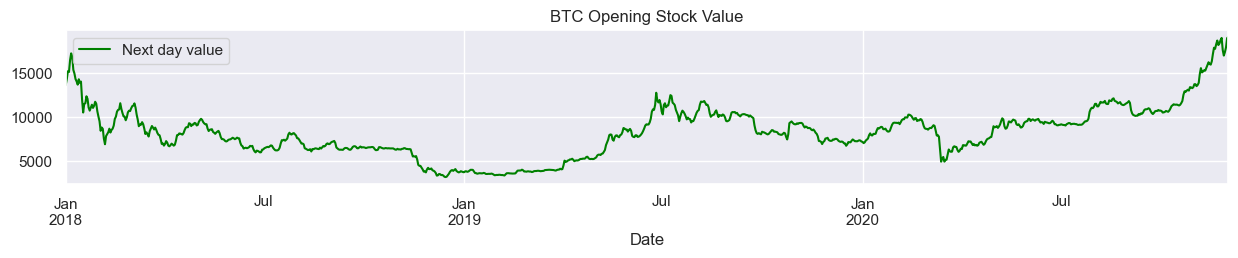

In [11]:
## METHOD 1

#btc['Mean'].plot(color= 'green', figsize=(15,2))
#plt.legend(['Next day value', 'Mean'])
#plt.title("BTC Opening Stock Value")

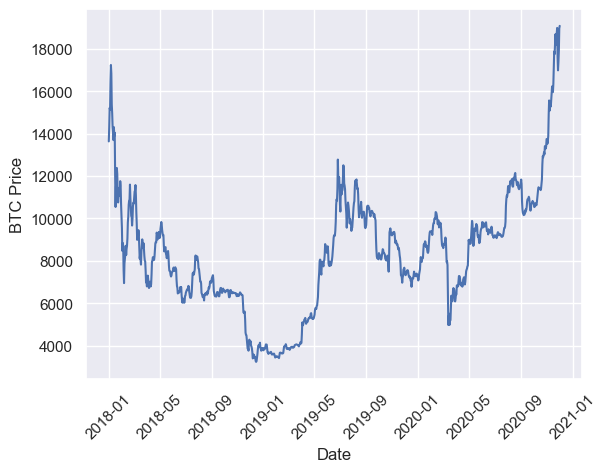

In [10]:
## METHOD 2
## Create a frame
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
# plot
plt.plot(btc.index, btc['Mean'], )

#plt.plot(btc.index, btc['Actual'], )

**CHECK BEHAVIOR OF TIME SERIES**

In [71]:
## calculate Hurst exponent

def hurst(ts):
    """Return the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    # Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    # Use a linear regression to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    # Return the Hurst exponent from the polyfit output
    return poly[0] * 2.0

# Calculate the Hurst exponent for the time series

df = btc[['Mean']]

hurst_exponent = hurst(df)
print("The Hurst Exponent is %s" % hurst_exponent)

KeyError: "None of [Index(['Actual'], dtype='object')] are in the [columns]"

==============================================
The Hurst exponent is a statistical measure that describes the long-term memory of a time series. It can take values between 0 and 1 and is used to determine the type of behavior in a time series.

A Hurst exponent of 0.44178125 is considered to be between 0 and 0.5, which indicates that the time series is considered to have "anti-persistent" behavior. In other words, the time series exhibits an alternating pattern of up-trends and down-trends over time. Anti-persistent time series are less predictable and tend to have more random fluctuations.

In general, a Hurst exponent of:
0.5 indicates random walk behavior and a time series that is a Brownian motion.
greater than 0.5 indicates persistent behavior, where the time series tends to continue in the same direction over time.
less than 0.5 indicates anti-persistent behavior, where the time series tends to alternate between up-trends and down-trends.

================================================

**Decomposing Time Series**
Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.

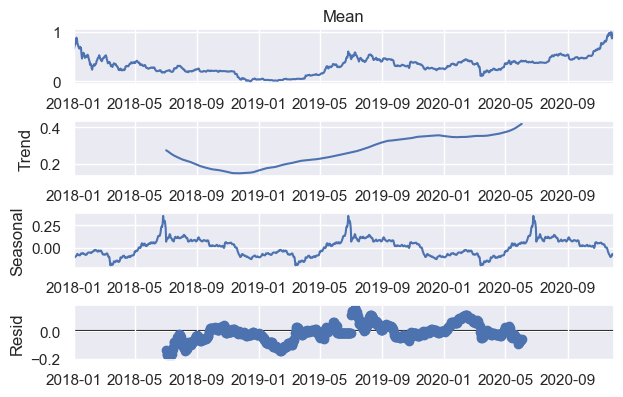

In [15]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add', period = 365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

**Check for Data Stationarity using Augmented Dickey-Fuller(ADF) test**

In [16]:
from statsmodels.tsa.stattools import adfuller


# WRITE A FUNCTION TO SHOW ADF RESULT
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print( "p_value =", dftest[1])
        print("Reject Null Hypothesis - Data is Stationary")
    else:
        print("p_value =", dftest[1])
        print("Fail to reject Null Hypothesis - Data is non-stationary")
        
        

y_test=y['Stock Price next day'][:train_size].dropna()

result = adfuller(y_test, autolag='AIC', regression='ct')
#print(result[0])
print(result[1])

test_adf(y_test, "btc")



0.15596446954599164
p_value = 0.15596446954599164
Fail to reject Null Hypothesis - Data is non-stationary


In [17]:
#check if we can make the data stationary by applying one difference
test_adf(y_test.diff(), "BTC_Stock Price")

p_value = 3.103624516540399e-14
Reject Null Hypothesis - Data is Stationary


**Check for autocorrelation

In [18]:
## 1. ACF AND PACF PLOT

C:\Users\OS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


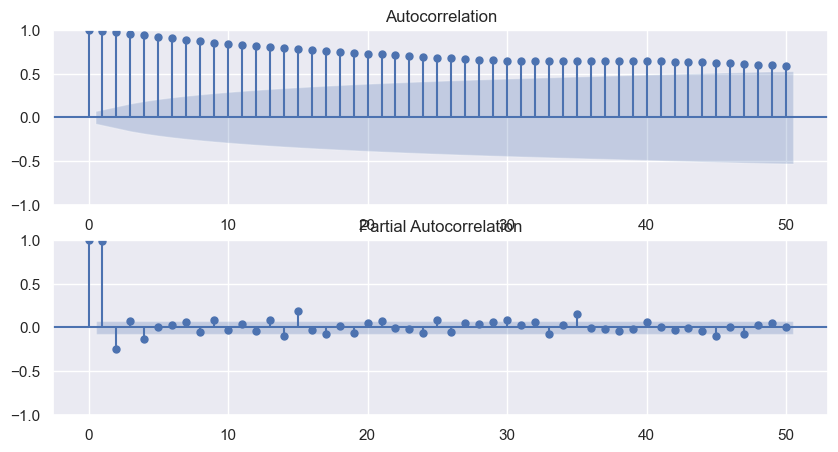

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

the PACF plot has a significant spike at lag 1 and lag 2, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 and lag 2 autocorrelations.

============================
Here are a few key things to look for when interpreting ACF and PACF plots:

Cutoff: If the ACF or PACF plot cuts off quickly, it suggests that there is a pattern in the data that repeats after a certain number of lags. The number of lags at which the plot cuts off is known as the "order" of the pattern.

Slow decay: If the ACF or PACF plot decays slowly, it suggests that the time series has a long memory, meaning that the present value is strongly influenced by the values far in the past.

Significant spikes: If there is a significant spike at a particular lag, it suggests that there is a strong correlation between the observation and the lagged observation at that lag. This information can be used to determine the order of the autoregressive (AR) or moving average (MA) components in the time series model.

============================

In [ ]:
## 2. Ljung-Box test

In [73]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#Since the data is not stationary => perform a log transform this time (log differencing)
df_diff= np.log(df).diff().dropna()

acorr_ljungbox(df_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,108.551921,2.034504e-25
2,110.001190,1.298809e-24
3,111.177783,6.121461e-24
4,112.754904,1.880724e-23
5,114.497978,4.585895e-23
6,114.691057,2.119660e-22
7,114.691154,9.745778e-22
8,121.136140,1.931453e-22
9,122.448109,4.211523e-22
10,122.730678,1.411295e-21


==============================================
This shows that the test statistic for all lags up to lag 10 are significant (p-value < 0.05),
so you can reject the null hypothesis. Rejecting the null hypothesis means you reject the
claim that there is no autocorrelation.

============================================

**Missing data**

In [ ]:
# Create the handle_missing_data function:

def handle_missing_data(df):
n = int(df.isna().sum())
if n > 0:
print(f'found {n} missing observations...')
df.ffill(inplace=True)

In [ ]:
## check each DataFrame to the handle_missing_data function

for df in [air_copy, energy_copy, daily_temp_copy]:
handle_missing_data(df)


**NORMALIZE DATA**

***Normalize data***
Since the stock prices and volume are on a different scale, we need to normalize the data
scale the data to a fixed range between 0 to 1

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc_in = MinMaxScaler(feature_range=(0, 1))
scaler_input = sc_in.fit_transform(btc[["Low", "High","Open", "Close", "Volume", "Adj Close", "Mean"]])
scaler_input =pd.DataFrame(scaler_input)
X=scaler_input

X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X.index=btc.index
X.head(2)



,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2018-01-01,0.647401,0.653979,0.663268,0.635816,0.103428,0.635816,0.656133
2018-01-02,0.647979,0.734386,0.633556,0.716657,0.195456,0.716657,0.698444


In [12]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(btc[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

y.rename(columns={0:'Stock Price next day'}, inplace= True)
y.index=btc.index
y.head(2)


,Stock Price next day
Date,
2018-01-01,0.698444
2018-01-02,0.755511


**SPLIT DATA FOR TRAIN AND TEST**

In [29]:
# drop the Date variable if there is Date column in data
#btc = btc.drop('Date', axis=1)

In [35]:
## METHOD 1: SPLIT TRAN & TEST BY TIME

##training data: before November 2020, testing data after 2020

#btc.rename(columns = {'Close':'BTC-USD'}, inplace = True)

#train = btc[btc.index < pd.to_datetime("2020-11-01 00:00:00+00:00", errors='coerce', format='%Y-%m-%d %H:%M:%S')]
#test = btc[btc.index > pd.to_datetime("2020-11-01 00:00:00+00:00", errors='coerce', format='%Y-%m-%d %H:%M:%S')]

#print(train.head())
#print(test.head())

                                BTC-USD
Date                                   
2018-01-01 00:00:00+00:00  13657.200195
2018-01-02 00:00:00+00:00  14982.099609
2018-01-03 00:00:00+00:00  15201.000000
2018-01-04 00:00:00+00:00  15599.200195
2018-01-05 00:00:00+00:00  17429.500000
                                BTC-USD
Date                                   
2020-11-02 00:00:00+00:00  13550.489258
2020-11-03 00:00:00+00:00  13950.300781
2020-11-04 00:00:00+00:00  14133.707031
2020-11-05 00:00:00+00:00  15579.848633
2020-11-06 00:00:00+00:00  15565.880859


In [13]:
## METHOD 2: split train test by %

train_size=int(len(btc) *0.7)
test_size = int(len(btc)) *0.3
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

print(train_X.head())
print(test_y.head())

                 Low      High      Open     Close    Volume  Adj Close  \
Date                                                                      
2018-01-01  0.647401  0.653979  0.663268  0.635816  0.103428   0.635816   
2018-01-02  0.647979  0.734386  0.633556  0.716657  0.195456   0.716657   
2018-01-03  0.757200  0.742123  0.716080  0.730013  0.195811   0.730013   
2018-01-04  0.736258  0.752195  0.733919  0.754310  0.264758   0.754310   
2018-01-05  0.780482  0.870809  0.746512  0.865988  0.293645   0.865988   

                Mean  
Date                  
2018-01-01  0.656133  
2018-01-02  0.698444  
2018-01-03  0.755511  
2018-01-04  0.750609  
2018-01-05  0.834079  
            Stock Price next day
Date                            
2020-01-17              0.358751
2020-01-18              0.357013
2020-01-19              0.341923
2020-01-20              0.341739
2020-01-21              0.345825


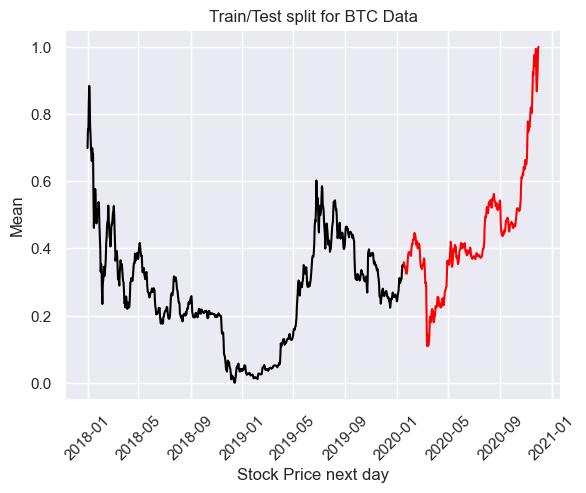

In [14]:
# plot train and test

plt.plot(train_y, color = "black")
plt.plot(test_y, color = "red")
plt.ylabel('Mean')
plt.xlabel('Stock Price next day')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()


 ***Autoregressive Intergrated Moving Average (ARIMA) ***
 
 use autocorrelation function (ACF) and partial autocorrelation (PACF) plots to determine the AR and MA terms
 - ACF plot: is a bar chart of the coefficients of correlation between a time series and its lags. It helps determine the value of p or the AR term.
- PACF plot: a plot of the partial correlation coefficients between the series and lags of itself. Helps determine the value of q or the MA term



**pyramid auto Arima to perform a stepwise search for AR and MA term that gives the lowest value of AIC

In [20]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3959.239, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3884.536, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3948.151, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3960.740, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3886.028, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3959.465, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3957.511, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3962.468, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3960.832, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3961.182, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3949.903, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3959.235, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.612 seconds


In [21]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  746
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1983.234
Date:                Fri, 03 Feb 2023   AIC                          -3962.468
Time:                        14:06:50   BIC                          -3953.241
Sample:                    01-01-2018   HQIC                         -3958.911
                         - 01-16-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3445      0.019     18.505      0.000       0.308       0.381
sigma2         0.0003   6.17e-06     46.181      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              3240.84
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

recommend model is SARIMAX(0,1,1)

In [ ]:
## Train the model

In [22]:
train_y.info()
print(train_y.head(2))


train_X.info()
print(train_X.head(2))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2018-01-01 to 2020-01-16
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Price next day  746 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB
            Stock Price next day
Date                            
2018-01-01              0.698444
2018-01-02              0.755511
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2018-01-01 to 2020-01-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Low        746 non-null    float64
 1   High       746 non-null    float64
 2   Open       746 non-null    float64
 3   Close      746 non-null    float64
 4   Volume     746 non-null    float64
 5   Adj Close  746 non-null    float64
 6   Mean       746 non-null    float64
dtypes: float64(7)
memory usage: 46.6 KB
                 Low      H

In [86]:
## use when have error "The indices for endog and exog are not aligned"
#new_y = train_y.values.reshape(-1,1)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(train_y, 
 exog=train_X,
 order=(0,1,1),
 enforce_invertibility=False, enforce_stationarity=False, freq='D')

C:\Users\OS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
results= model.fit()

results.summary()

C:\Users\OS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Stock Price next day   No. Observations:                  746
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                2179.117
Date:                  Fri, 03 Feb 2023   AIC                          -4340.234
Time:                          22:18:33   BIC                          -4298.738
Sample:                      01-01-2018   HQIC                         -4324.238
                           - 01-16-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Low           -0.0477      0.023     -2.038      0.042      -0.093      -0.002
High          -0.1495      0.033     -4.473      0.000      -0.215      -0.084
Open           0.0818      0.025      3.234      0.001       0.032       0.131
Close          0.6125      0.016     38.679      0.000       0.581       0.644
Volume         0.0072      0.011      0.679      0.497      -0.014       0.028
Adj Close      0.6125      0.016     38.679      0.000       0.581       0.644
Mean          -0.1012      0.018     -5.744      0.000      -0.136      -0.067
ma.L1         -0.9675      0.010    -93.968      0.000      -0.988      -0.947
sigma2         0.0002   4.11e-06     40.342      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2283.98
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.57e+16. Standard errors may be unstable.
"""

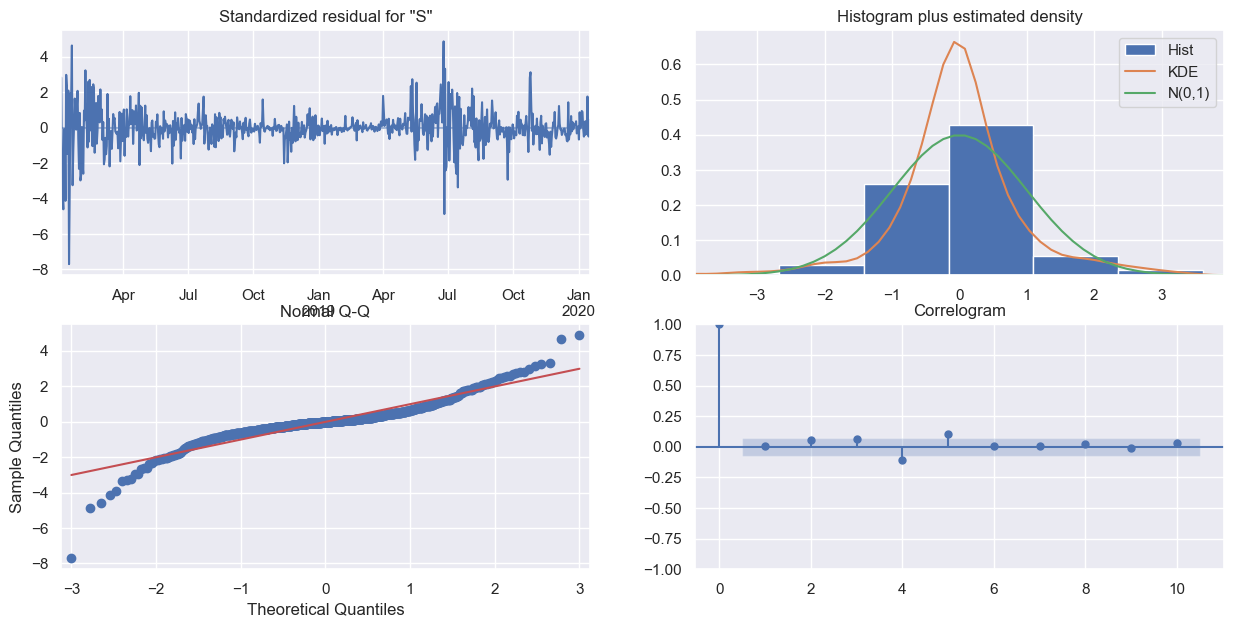

In [36]:
results.plot_diagnostics(figsize=(15,7)); plt.show()

=> the histogram and QQPlot show that the residuals do not fit a perfectly normal distribution.

In [45]:
print(train_y.head(2))

print(train_X.head())
print(y_test.head(2))

print(train_y.head())
print(test_y.tail(2))
print(steps)

            Stock Price next day
Date                            
2018-01-01              0.698444
2018-01-02              0.755511
                 Low      High      Open     Close    Volume  Adj Close  \
Date                                                                      
2018-01-01  0.647401  0.653979  0.663268  0.635816  0.103428   0.635816   
2018-01-02  0.647979  0.734386  0.633556  0.716657  0.195456   0.716657   
2018-01-03  0.757200  0.742123  0.716080  0.730013  0.195811   0.730013   
2018-01-04  0.736258  0.752195  0.733919  0.754310  0.264758   0.754310   
2018-01-05  0.780482  0.870809  0.746512  0.865988  0.293645   0.865988   

                Mean  
Date                  
2018-01-01  0.656133  
2018-01-02  0.698444  
2018-01-03  0.755511  
2018-01-04  0.750609  
2018-01-05  0.834079  
Date
2018-01-01    0.698444
2018-01-02    0.755511
Name: Stock Price next day, dtype: float64
            Stock Price next day
Date                            
2018-01-01           

In [51]:
#predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X) # check if need -1 or not. 
start_date="2020-01-17"
end_date="2020-11-30"
predictions= results.predict(start ='2020-01-17', end='2020-12-01',exog=test_X)
#predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)


In [52]:
print(predictions.head())
predictions.info()

2020-01-17    0.360515
2020-01-18    0.360541
2020-01-19    0.342563
2020-01-20    0.342452
2020-01-21    0.348562
Freq: D, Name: predicted_mean, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 320 entries, 2020-01-17 to 2020-12-01
Freq: D
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [ ]:
## plot predictions

In [54]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

print(act.head())

            Stock Price next day
Date                            
2020-01-17              0.358751
2020-01-18              0.357013
2020-01-19              0.341923
2020-01-20              0.341739
2020-01-21              0.345825


In [55]:
## create the data frame to store the Date, Actual and Predicted data
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

print(predictions.head())

print(test_X.head())

            predicted_mean    Actual
Date                                
2020-01-17        0.360515  0.358751
2020-01-18        0.360541  0.357013
2020-01-19        0.342563  0.341923
2020-01-20        0.342452  0.341739
2020-01-21        0.348562  0.345825
                 Low      High      Open     Close    Volume  Adj Close  \
Date                                                                      
2020-01-17  0.356470  0.342941  0.334742  0.347321  0.469564   0.347321   
2020-01-18  0.366217  0.346205  0.347061  0.348162  0.412927   0.348162   
2020-01-19  0.352751  0.355388  0.347929  0.333727  0.439313   0.333727   
2020-01-20  0.348878  0.330116  0.333487  0.330762  0.329885   0.330762   
2020-01-21  0.347841  0.330726  0.330704  0.336147  0.297246   0.336147   

                Mean  
Date                  
2020-01-17  0.352313  
2020-01-18  0.358751  
2020-01-19  0.357013  
2020-01-20  0.341923  
2020-01-21  0.341739  


<AxesSubplot:xlabel='Date'>

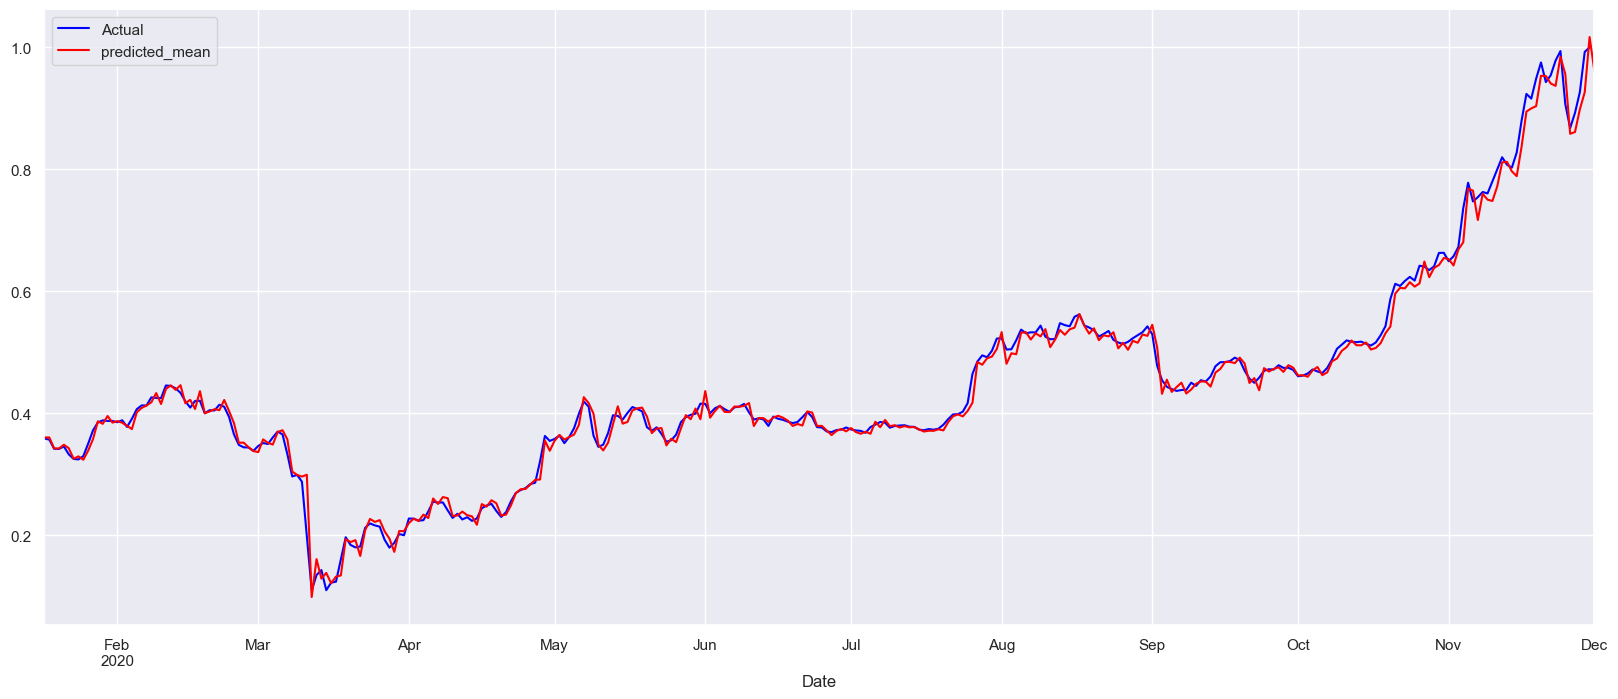

In [57]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

In [62]:
## Evaluating the model
from statsmodels.tools.eval_measures import rmse
a =rmse(predictions['predicted_mean'], predictions['Actual'])
print(a)

nan


============================================
RMSE is commonly used to measure the performance of predictive models (for example, comparing regression models). Generally,
a lower RMSE is desirable; it tells us that the model can fit the dataset. Simply stated, it tells us the average distance (error) between the predicted value and the actual value. You want this distance minimized.

=============================================

In [60]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2020-01-17 to 2020-12-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   predicted_mean  320 non-null    float64
 1   Actual          319 non-null    float64
dtypes: float64(2)
memory usage: 7.5 KB


In [63]:
#Scaling back to original values
trainPredict = sc_out.inverse_transform(predictions[['predicted_mean']])
testPredict = sc_out.inverse_transform(predictions[['Actual']])

In [65]:
print(trainPredict)

[[ 8947.72234247]
 [ 8948.1274989 ]
 [ 8663.17725056]
 [ 8661.4080047 ]
 [ 8758.26624391]
 [ 8669.15963318]
 [ 8394.74472094]
 [ 8457.07163987]
 [ 8368.22589763]
 [ 8606.79643312]
 [ 8906.63864768]
 [ 9367.72383857]
 [ 9301.99923247]
 [ 9504.7889742 ]
 [ 9333.62835603]
 [ 9373.09753563]
 [ 9330.73615617]
 [ 9250.15122338]
 [ 9165.05577377]
 [ 9600.58956917]
 [ 9715.31917101]
 [ 9776.7497544 ]
 [ 9861.61095378]
 [10100.2486793 ]
 [ 9817.29342936]
 [10207.50478707]
 [10301.08729444]
 [10184.06161692]
 [10306.65776905]
 [ 9836.03222305]
 [ 9925.82639553]
 [ 9688.04745069]
 [10150.39581506]
 [ 9579.49601082]
 [ 9622.47986391]
 [ 9683.45536955]
 [ 9657.4491868 ]
 [ 9921.71260849]
 [ 9632.602642  ]
 [ 9322.66837288]
 [ 8810.64160616]
 [ 8813.80852523]
 [ 8693.42010866]
 [ 8595.18854232]
 [ 8567.17018298]
 [ 8896.51394283]
 [ 8809.27695708]
 [ 8762.93972605]
 [ 9089.63275193]
 [ 9136.11063319]
 [ 8895.22627549]
 [ 8060.84024743]
 [ 7974.39841773]
 [ 7930.87610038]
 [ 7979.46654544]
 [ 4801.74